In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_json('downloads\\food_enforcement_US_bacteria.json', orient='records')

In [3]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Bag of words feature representation for descriptive text

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b', max_df=0.9, strip_accents='ascii')

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 5901)

### fit kmeans

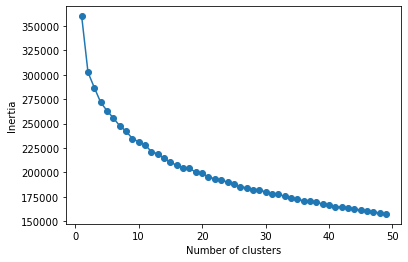

In [11]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans

clusterNum = 50
# km = KMeans(n_clusters=clusterVal,n_init=30,n_jobs=-1)
# km.fit(X)

# print out plot for testing different numbers of clusters
distortions = []
for i in range(1, clusterNum):
    km = KMeans(n_clusters=i,n_init=30)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, clusterNum), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### labels are named with integers and stored in the `labels_` attribute

In [12]:
km.labels_

array([36, 36, 11, ..., 11, 27, 43])

### take a look at one of the cluster results

In [18]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 10:
        print(raw_data['product_description'][i])
        print('**********')

Not Ready to Eat, IQF green peas.  Products' labels contains Cooking Instructions.  Products are sold under various brands and various net weight.    Bountiful Harvest Green Peas, item #  22486-11904, case UPC & label UPC 30822486119042  and 2248611904, net wt. 12/2.5 LB      C&W Early Harvest Petite Peas, item # 70332-00159, case UPC & label UPC 10070332001591 and 7033200159, net wt. 12/16 oz.    C&W Petite Peas, item # 70332-00158, case UPC & label UPC 10070332001584 and 7033200158, net wt. 12/16 OZ    Crown Point  Green Peas, item # CNP99-11239, case UPC & label UPC 10813973017008, net wt. 20 LB    Crown Point Peas, item # CNP99-11240, case UPC & label UPC 10813973016902, net wt. 12/2.5 LB    Early Dawn Green Peas, item # ERDEX-8M445, case UPC & label ERDEX-8M445 and 7437331521, net wt. 24/500 G     Early Dawn Green Peas, item # ERDEX-8M540, case UPC & label UPC 7437331523, net wt. 6/2 KG     Evergreen Green Peas, item # EVGEX-20440, case UPC & label UPC 4940507000126, net wt 12/1 K